# Solution - Classification using K Nearest Neighbors

<img src="https://www.pngkey.com/png/full/574-5745035_machine-learning-workflow-machine-learning-data-pipeline.png" width=700px>


## Agenda for today

</p>

1. Review Gettting Started Assignment
1. Remind ourselves of Train vs Test
1. Use KNN classifier on breast cancer dataset
1. Evaluate the quality of the model

## 0. Imports for the day

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

plt.style.use('ggplot')
%matplotlib inline

---
## 1. Review of Getting Started Notebook

Pull up the [solution notebook](./notebooks/day-3/day-3_Getting_Started_with_Classification_Models-SOL.ipynb)

----
## 2. Training vs Testing

As you learned in the pre-class, classification is an ML process that maps features of an input data set to class labels. Classification is a **supervised** learning approach where example data is used to train the data. We typically divide the data used to train and evaluate the classifier (the result model) into two sets (training and testing). _In some cases, folks split into three sets (training, testing, and validation)._

&#9989; **Do This:** As a group, discuss what these three sets represent. It might help to review these terms on the web. The answers down below:

<font size=8 color="#009600">&#9998;</font> Training set is:

<font size=8 color="#009600">&#9998;</font> Testing set is:

**Defining the features and building the model**

If you review the image at the top of the notebook, you might notice that one of the first steps in machine learning is to go from "raw data" into a set of "features" and "labels". Extracting features from our data can sometimes be one of the trickier parts of the process and also one of the most important ones. We have to think carefully about exactly what the "right" features are for training our machine learning algorithm and, when possible, it is advantageous to find ways to reduce the total number of features we are trying to model. Once we define our features, we can build our model.

### 2.1 Working with data

There is a common data set used to work with classification called the breast cancer data set. It is actually available in `sklearn` but what fun is working withe cleaned up data. Let's look at the original. We will use [data from a Breast Cancer study](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) for this notebook. On this site, you will find  "breast-cancer-wisconsin.data" and "breast-cancer-wisconsin.names". The data are in ".data" and the ".names" describes that data. 

We can also directly import them from the web:

* [https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data)
* [https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.names](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.names)

Read in the data, label the columns based on the .names file. Look at the dtypes, anything unusual? Why?

<font size=8 color="#009600">&#9998;</font> What's unusual about dtypes? Why?

In [2]:
# your code here

In [3]:
### ANSWER ###

bc_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',
                     names = ["Sample code number",
                              "Clump Thickness",
                              "Uniformity of Cell Size",
                              "Uniformity of Cell Shape",
                              "Marginal Adhesion",
                              "Single Epithelial Cell Size",
                              "Bare Nuclei",
                              "Bland Chromatin",
                              "Normal Nucleoli",
                              "Mitoses",
                              "Class"])
#bc_data.head()
bc_data.dtypes

Sample code number              int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

Can you write code to identify what the problem is? That is, can you provide a DataFrame of the offending rows that are causing the problem? There are lots of ways to do this and, frankly, it is probably a bit hard so don't get hung up too long on this. Give it a try though:

In [4]:
# your code here

In [5]:
### ANSWER ####

bc_data[bc_data['Bare Nuclei'] == '?']

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


OK, we have an imputation problem. Write code to solve it and say what you did.

By the way, there is an argument `na_values` that you can provide to `read_csv` that will mark a list of characters as if they were `np.nan` using `na_values`, which is pretty darn convenient. Using that will help when importing the data for classification.  

Read the data in using `na_values='?'` to replace missing data with `np.nan`. Check the `dtypes` again.

In [6]:
# code here

In [7]:
### ANSWER ####

bc_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',
                     names = ["Sample code number",
                              "Clump Thickness",
                              "Uniformity of Cell Size",
                              "Uniformity of Cell Shape",
                              "Marginal Adhesion",
                              "Single Epithelial Cell Size",
                              "Bare Nuclei",
                              "Bland Chromatin",
                              "Normal Nucleoli",
                              "Mitoses",
                              "Class"],
                     na_values = '?')
#bc_data.head()
bc_data.dtypes

Sample code number               int64
Clump Thickness                  int64
Uniformity of Cell Size          int64
Uniformity of Cell Shape         int64
Marginal Adhesion                int64
Single Epithelial Cell Size      int64
Bare Nuclei                    float64
Bland Chromatin                  int64
Normal Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

----
### 2.2 : Splitting the dataset for model into training and testing sets
Let's split the data in a training set and final testing set. We want to randomly select 75% of the data for training and 25% of the data for testing.

You should turn the `class_labels` into 0 (now 2, for benign) and 1 (now 4, for malignant) as the classifier we are using (Logisitic Regression) predicts valuse between 0 and 1.

&#9989; Do This - You will need to come up with a way to split the data into separate training and testing sets (we will leave the validation set out for now).  Make sure you keep the feature vectors and classes together.  

**BIG HINT**: This is a very common step in machine learning, and there exists a function to do this for you in the `sklearn` library called `train_test_split`. From the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), you find that takes the features and class labels as input and returns a 4 outputs:
- 2 feature sets (one for training and one for testing)
- 2 class labels sets (the corresponding one for training and for testing)

Use `train_test_split` to split your data into a training set and a testing set that correspond to 75% and 25% of your data respectively. Check the length of the resulting output to make sure the splits follow what you expected.

One last thing: KNN doesn't work with missing data. You will need to use `dropna()` to get rid of them.

In [8]:
## your code here

In [9]:
### ANSWER ###

## change 2 to 0 (benign) and 4 to 1 (malignant)

bc_data['Class'].replace(to_replace={2:0, 4:1}, inplace=True)
#bc_data.head()
print('Length of data set:', len(bc_data))

## we need to drop NAs for now
bc_data.dropna(inplace=True)
print('Length after drop:', len(bc_data))

## split data

X = bc_data.drop(columns=['Sample code number','Class'])
y = bc_data['Class']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25)

print('Length of train:',len(Xtrain))
print('Length of test:',len(Xtest))

Length of data set: 699
Length after drop: 683
Length of train: 512
Length of test: 171


**Question**: Why do we need to separate our samples into a training and testing set. Why can't we just use all the data for both? Wouldn't that make it work better?

<font size=8 color="#009600">&#9998;</font> Do This - Erase the contents of this cell and replace it with your answer to the above question!  (double-click on this text to edit this cell, and hit shift+enter to save the text)

----
## 3 K Nearest Neighbors

One of the more conceptually simply classifiers in K Nearest Neighbors or KNN. In KNN, we assume that in the N-dimensional space, which represents the N input features, that things in the same close are "close" to each other. That is the more similar their location in this virtual space, the more likely two points (or three or four...) are members of the same class.

KNN has one basic "hyperparameter", which is what we can use to tune the model. It is how many neighbors it should include as part of the analysis (2, 3, 4, etc.). We will explore this at the end of the notebook. For now, we will setup the model.

More information on KNN from a conceptual persepctive is in the video below.

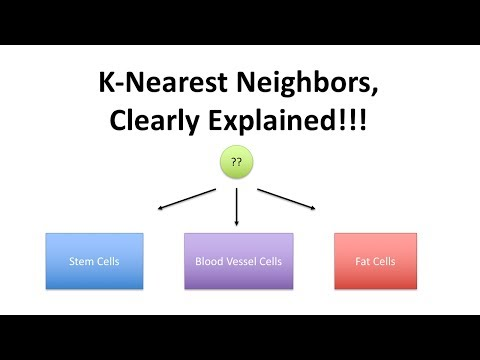

In [10]:
from IPython.display import YouTubeVideo
YouTubeVideo("HVXime0nQeI",width=640,height=360)

### 3.1 The benefits of `sklearn`

The `sklearn` workflow is similar across all implementations. We will always:

1. Create the model object (in this case `KNeighborsClassifier()`). _You can set hyperparameters at this step._
2. Fit the model to the training data (this uses the `.fit()` method).
3. Use that model to predict from the test set (this uses the `.predict()` method).

If you named your training and testing data: `Xtrain, Xtest, ytrain, ytest`, then this call is quite simple.

```python
knn = KNeighborsClassifier()  ## Create model object
knn.fit(Xtrain,ytrain)        ## Fit model to training data
ypred = knn.predict(Xtest)    ## Predict the classes of the test data
```

<font size=8 color="#009600">&#9998;</font> Do this. Implement this knn model for your data. What is `ypred`? What does `ypred` look like?

In [11]:
# your code

In [12]:
### ANSWER ###

knn = KNeighborsClassifier()
knn.fit(Xtrain,ytrain)
ypred = knn.predict(Xtest)
print(ypred)

[0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0
 1 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1
 1 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1
 1 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0]


### 3.1 How'd it go?

There are a number of ways that we can check the performance of our model. The major difference in the standard statistics approach and supervised learning approaches is that we test our models using the data that we held out: "the test data." 

That is, we will use our classifier model to make predictions from the test features and we can then compare those predictions to actual test labels. As you did above, we can use the output of the `.fit()` method of the model to predict how well the classifier works on the test data (the data it was not trained on). Conveniently that is the `.predict()` method and, again, we use it on the result of the `.fit()`. 

But how well did the model do? It turns out that we can't simply make a plot of predicted versus actual like we did for regression. Instead, we use the "confusion matrix" and associated measures derived from it. The [Confusion Matrix](https://en.wikipedia.org/wiki/Confusion_matrix) gives you the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN). Through this we can determine the accuracy but the total number of TPs and TNs compared to all the data in the test set.

In the `metrics` library, there's a method called `confusion_matrix` [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html). We will start by using that. 

<font size=8 color="#009600">&#9998;</font> Using this method to print out the confusion matrix. What is the number of TPs, TNs, FPs, and FNs in your model? Can you calculate the accuracy (1 is perfect, 0 is terrible) of the model from these?

In [13]:
# your code here

In [14]:
### ANSWER ### 

print(metrics.confusion_matrix(ypred,ytest))
tn, fp, fn, tp = metrics.confusion_matrix(ypred,ytest).ravel()

acc = (tn+tp)/(tn+fp+fn+tp)
print("Accuracy:", acc)

[[110   1]
 [  1  59]]
Accuracy: 0.9883040935672515


This accuracy metric is alrady built into `sklearn`, it's called `accuracy_score`, which compares the predictions our model made for the test labels and the actual test labels. The `accuracy_score` is one of many metrics we can use and is included in `sklearn.metrics`. Here's the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) on `accuracy_score`.

<font size=8 color="#009600">&#9998;</font> Do this:
- Use the `sklearn.metrics` we imported at the top and run the `accuracy_score` on the 0/1 predicted label and the test labels.
- Print your accuracy result

In [15]:
## your code here

In [16]:
print(metrics.accuracy_score(ypred,ytest))

0.9883040935672515


**Question:** How well did your model predict the test class labels? Given what you learned in the pre-class assignment about false positives and false negatives, what other questions should we ask about the accuracy of our model?

<font size=8 color="#009600">&#9998;</font> Answer here.

---
## 4. Tuning hyperparameters

Most ML models have some number of parameters that can be tuned to try to build better models. Later, we will see hwo to explore those parameters automatically, but now, we will just do things manually. For KNN, this is ok because there's only one commnly tuned parameter: `n_neighbors`, which the number of neighboring points the algorithm takes into account when it looks for similar classes.

Look at the [documentation for KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) and determine the default number of neighbors. 

<font size=8 color="#009600">&#9998;</font> Do this. 

- Repeat your analysis above (you only need to create a new model, not resplit the data!). 
- Choose a number of neighbors that is fewer than the default. 

How does your model perform compared to the default?

In [17]:
## your code here

In [18]:
### ANSWER ###

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(Xtrain, ytrain)
ypred = knn.predict(Xtest)

print(metrics.accuracy_score(ypred, ytest))

0.9824561403508771


### 4.1 Automate it

Now that you have checked a slightly different number of neighbors, let's systematically see how our accuract changes with number of neighbors.

<font size=8 color="#009600">&#9998;</font> Do this. 

- Write a function that takes number of neighbors and returns accuracy of the model
- For 2 to 10 neighbors, compute the accuracy
- Plot the accuracy as a function of number of neighbors

What happens to the accuracy? Is there a good choice of `n_neighbors` to acheive the highest accuracy?

In [19]:
## your code here

(1.0, 11.0, 0.9, 1.0)

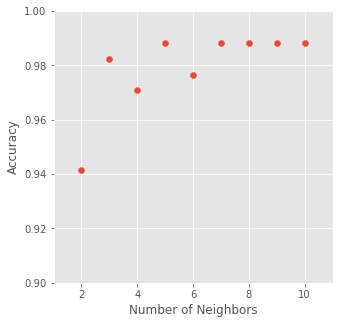

In [20]:
### ANSWER ###

def KNNCompute(xtrain, xtest, ytrain, ytest, n=5):
    
    '''
    Take a data set (xtrain, xtest, ytrain, ytest) and 
    fit a KNN model with a given number of neighbors (n).
    Return the accuracy of that model.
    '''
    
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(Xtrain, ytrain)
    ypred = knn.predict(Xtest)
    
    return (metrics.accuracy_score(ypred, ytest))

acc_array = []
neighbors = np.arange(2,11)

for i in neighbors:
    acc_array.append(KNNCompute(Xtrain, Xtest, ytrain, ytest, i))

plt.figure(figsize=(5,5))
plt.scatter(neighbors, acc_array)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.axis([1,11,.9,1])